# Building a NN using the Sequential API of tf.keras and training it using the california housing dataset.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Loading dataset

In [2]:
housing = fetch_california_housing()

In [3]:
df_data = pd.DataFrame(housing.data, columns = housing.feature_names)

In [4]:
df_data['target'] = pd.Series(housing.target)

In [5]:
df_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


- We will be dividing the entire data into train, validation and test data.
- We will then scale them using StandardScaler

In [6]:
x = np.array(df_data.drop(columns = 'target'))
y = np.array(df_data.target)

In [7]:
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, random_state = 42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state = 42)

In [8]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [9]:
x_valid

array([[-0.72894678,  0.42524224, -0.72520018, ...,  0.76884409,
        -0.89312342,  0.86177927],
       [-0.53253697,  1.61186495, -0.07501671, ...,  0.22981129,
         0.96673881, -1.43714823],
       [-1.12428044, -0.36583956, -0.83039438, ..., -0.37482146,
        -1.35223299,  1.26159275],
       ...,
       [-0.38169423, -0.2076232 , -0.46608538, ...,  0.05940227,
        -0.64482947,  0.43697745],
       [-0.75078755,  0.50435042, -0.67205695, ..., -0.3343433 ,
        -1.15078695,  1.10166736],
       [-0.07665671,  0.10880952, -0.42690329, ..., -0.15910745,
        -0.87438425,  0.8567816 ]])

## Building the model

- We will be having tow hidden layers having 30 units in each. The activation func. used will be Relu.
- There will be only one unit in the output layer.

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation = 'relu', input_shape = [8]))
model.add(keras.layers.Dense(1, activation = 'relu', ))
model.add(keras.layers.Dense(1))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


## Compiling the model

In [12]:
model.compile(loss = 'mse', optimizer = keras.optimizers.SGD(lr = 1e-3))

## Training the model

In [13]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 3.6609 - val_loss: 2.2287
Epoch 2/10
363/363 [==============================] - 0s 829us/step - loss: 1.8705 - val_loss: 1.5050
Epoch 3/10
363/363 [==============================] - 0s 830us/step - loss: 1.4629 - val_loss: 1.3488
Epoch 4/10
363/363 [==============================] - 0s 831us/step - loss: 1.3687 - val_loss: 1.3187
Epoch 5/10
363/363 [==============================] - 0s 890us/step - loss: 1.3464 - val_loss: 1.3142
Epoch 6/10
363/363 [==============================] - 0s 841us/step - loss: 1.3411 - val_loss: 1.3144
Epoch 7/10
363/363 [==============================] - 0s 969us/step - loss: 1.3397 - val_loss: 1.3150
Epoch 8/10
363/363 [==============================] - 0s 928us/step - loss: 1.3393 - val_loss: 1.3152
Epoch 9/10
363/363 [==============================] - 0s 857us/step - loss: 1.3391 - val_loss: 1.3154
Epoch 10/10
363/363 [==============================] - 0s 932us/step - loss: 1.3389 

In [14]:
df_metrics = pd.DataFrame(history.history)

In [15]:
df_metrics.head()

,loss,val_loss
0,3.660930,2.228678
1,1.870526,1.505033
2,1.462891,1.348757
3,1.368650,1.318716
4,1.346422,1.314171


<AxesSubplot:>

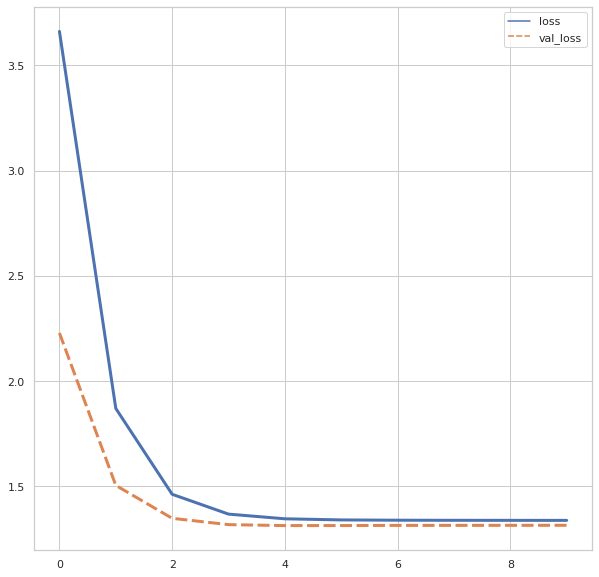

In [16]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (10,10))
sns.lineplot(data = df_metrics, linewidth = 3)

## Evaluating the model

In [17]:
model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 524us/step - loss: 1.3224


1.3223905563354492

## Saving and restoring the model

- Keras save sthe model if HDF% format. It will save all the hyperparameters, the weight and biases, and also the optimizers.

In [18]:
model.save('Sequential_API.h5')

- We can also load the model form a location.

In [19]:
model = keras.models.load_model('Sequential_API.h5')

In [20]:
x_new = x_test[:3]

In [21]:
model.predict(x_new)

array([[2.0841072],
       [2.0841072],
       [2.0841072]], dtype=float32)

In [22]:
model.save_weights('Sequential_API_weigths.ckpt')

In [23]:
model.load_weights('Sequential_API_weigths.ckpt')